<a href="https://colab.research.google.com/github/jacksonbhanson7/jacksonbhanson7.github.io/blob/main/jackson_hanson_activity_python_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity: Python Data Science with NumPy

**Initial Due Date: 2026-01-06 10:00AM**  
**Final Due Date: 2026-01-12 4:15PM**

> #### ❗ First step: “Copy to Drive” or “Save a Copy in Drive”
>
> Starter notebooks will initially open as a read-only view from GitHub.
> To save your work, create a copy in your Google Drive via the “Copy to
> Drive” button or “File→Save a copy in Drive”.
>
> ![](https://middcs.github.io/csci-1010-w26/assets/img/figs/colab-save-copy.png)

> #### ⚠️ This notebook will not run end-to-end at first
>
> This and other activity notebooks are designed for you to fill in key
> code blocks. Until you do so it will not run correctly end-to-end.
> Work through it in order, making sure preceding code blocks have been
> executed (and are correct). When you are done, restart the kernel and
> run the notebook completely to make sure it correctly executes in a
> fresh environment.

## Learning Objectives

By the end of this notebook, you will be able to:

1.  Create and manipulate NumPy arrays
2.  Understand the performance benefits of vectorization
3.  Apply vectorized operations instead of loops
4.  Use NumPy’s built-in functions for common operations

## Introduction

This activity uses NumPy, the standard library for numerical arrays in
Python. Recall from class that NumPy’s central data structure is
`ndarray`, an N-dimensional array containing values of the same type
(`dtype` in NumPy). These N-dimensional arrays are also referred to as
[“tensors”](https://en.wikipedia.org/wiki/Tensor_(machine_learning)). A
1-D array is often called a “vector” and is analogous to R’s atomic
vector (a single element is referred to as a “scalar”). A 2-D array is
often called a “matrix” and is analogous to R’s matrix. NumPy arrays can
have more than 2 dimensions.

> #### 💡 Coming from R? Some tips.
>
> In many respects Python and R are very similar, especially when using
> libraries like NumPy and Pandas, which share inspiration with their R
> counterparts. Both are dynamically typed languages. Both offer similar
> semantic constructs like functions, loops, conditionals. Two immediate
> differences you will notice: Python uses indentation, not braces, to
> delineate blocks and Python is 0-indexed, i.e., sequences start at
> index 0, instead of at index 1 as in R.
>
> R was specifically designed for data analysis and so types like
> matrices, data frames, etc. are built into the language. In contrast
> Python is a more “general purpose” language and so those types are
> provided via external libraries. As a result there can sometime be
> interface “friction” as those libraries have to work within the
> features provided by Python.
>
> In these early notebooks we will include additional comments/notes to
> support your transition from R to Python. Keep an eye out!

As described in class, when using NumPy we want to start thinking in
“vector” or “array” operations, i.e., performing computations across
multiple values instead of using loops. That way we make best use of
NumPy’s high-performance native implementations (e.g., implemented in C,
not Python). Idiomatic NumPy code, like idiomatic R code, often has no
explicit loops.

NumPy et al. are massive libraries. No one can or should know the
functions that are available. Recall we are trying to cultivate a sense
of how to approach problems with these tools, and what kind of functions
should be available. We can then search the documentation, use GenAI
tools, Python’s built in `help` function, etc. to find and use the
relevant functions.

Get started by importing the relevant libraries:

In [3]:
# This is the typical import style/prefix. It makes all the NumPy types and functions
# available with a `np` prefix.
import numpy as np

print("NumPy version:", np.__version__)

NumPy version: 2.0.2


## Part A: Array creation and manipulation

A [random walk](https://en.wikipedia.org/wiki/Random_walk) is a path
composed of a succession of random steps, e.g. that path of molecule as
it travels in a liquid of gas. Random walks have many application in a
wide variety of fields from the physical sciences to finance! Here we
will consider a simple 1-D walk \[@mckinneyPythonDataAnalysis2022\].

In [4]:
# Create a 1-D random walk of +1 or -1 steps
steps = 100
# Randomly choose -1 or 1 `steps` times, producing 1-D integer array of length steps
delta = np.random.choice([-1, 1], steps)
# Compute the resulting walk as the cumulative sum of those steps, i.e., index i is the sum of 0..i-1 steps
walk = np.cumsum(delta)
print(walk) # Print the walk

[ 1  0 -1  0 -1  0 -1  0  1  2  3  2  3  4  5  4  3  4  3  2  3  4  5  6
  5  4  3  4  5  6  7  6  7  6  5  4  3  4  3  4  3  4  5  4  3  4  5  6
  7  8  9 10  9  8  9 10  9 10 11 12 13 12 13 14 15 16 17 16 17 18 17 16
 15 16 17 18 19 18 17 18 19 18 17 16 15 16 17 16 15 16 15 14 13 12 11 12
 13 14 13 14]


We will learn more about plotting shortly. For now, just treat the plot
as a given.

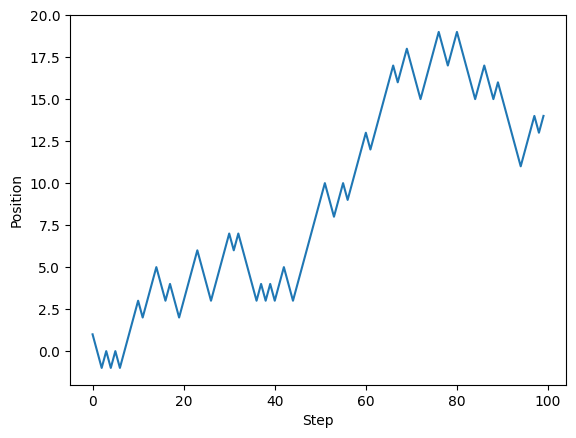

In [5]:
from matplotlib import pyplot as plt
plt.plot(range(0, len(walk)), walk)
plt.xlabel("Step")
plt.ylabel("Position")
plt.show()

The above is just a single a walk. We typically perform this simulation
many times, e.g., 5000, to get a distribution of outcomes. Here is where
the vectorized approach can be particularly helpful (for both
conciseness and performance). We can think of 5000 random walks of
length 100 as working with a 2-D array with 5000 rows and 100 columns
where each row is different walk and each column is a time step.

### What you should do

#### Exercise A1

The code below creates a 2-D array of size 5000x100. Complete the
function below to by defining a `walks` variable that computes the
position of each walk at each time point. We can use the same
[`cumsum`](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)
function, but note we need to specify which dimension or `axis` we want
to perform the sum across. If we don’t we will get the cumulative sum of
the entire entire array “flattened” into a 1-D vector. The axes are
numbered according to the shape, i.e., index 0 of the shape is axis 0,
index 1 is axis 1, … If the shape is `(5000, 100)`, summing across axis
1 sums across the 100 dimension (i.e., “across” the columns or “along”
the rows).

In [6]:
# `def` is used to define a function, here named `sim_walks` with two positional arguments
# `num_steps` and `num_walks`. The body of function is indented (typically 4 spaces, but any
# indentation is allowed as long as it is consistent).
def sim_walks(num_steps: int, num_walks: int) -> np.ndarray:
    """Simulate num_walks 1-D random walks of num_steps each"""
    delta = np.random.choice([-1, 1], (num_walks, num_steps)) # Specify size as 2-tuple (# rows, # columns)
    walks = np.cumsum(delta, axis = 1)
    # TODO: Your code here
    # Python requires an explicit `return` statement (unlike R which implicitly returns
    # value of the last expression in a function), which terminates execution and "returns"
    # a value to the caller. Functions without a `return` statement are permitted. In that
    # case, the function implicitly returns a special value `None`.
    return walks

walks = sim_walks(100, 5000)
print(walks.shape == (5000, 100)) # Verify the expected shape

True


#### Exercise A2

Replace the `pass` in the function below to return the distance of the
most distant ending point (from the origin) from across all the walks.
Think about what portions of the `walks` array might be relevant
answering that question. For context, your answer can be a single line.

In [7]:
def farthest_end(walks):
    """Return distance of most distant ending point in (walks, steps) walks array"""
    return np.max(np.abs(walks[:,-1]))
    # TODO: Your code here

farthest_end(walks)

np.int64(42)

#### Exercise A3

Replace the `pass` in the function below to return the fraction of all
steps in positive territory (\> 0).

In [8]:
def fraction_positive(walks):
    """Return fraction of steps in walks in positive territory (> 0)"""
    return np.mean(walks > 0)
    # TODO: Your code here

fraction_positive(walks)

np.float64(0.468262)

#### Exercise A4

Select the minimum NumPy features needed to implement `sim_walks`,
`farthest_end` and `fraction_positive`. Record your answers for this and
other inputs by updating the `value` argument below (just clicking
doesn’t save your answer), that way executing the notebook in the future
will display your answers. *Select all features needed.*

In [9]:
# Possible techniques used (select all that apply):
# 1. Vectorized operations
# 2. Numeric indexing
# 3. Logical indexing
# 4. Broadcasting
# 5. Reduction over specific axis

# TODO: Add number(s) to list (inside square brackets) for your selected answers,  e.g., 1 for "Vectorized operations"
techniques_values = [1, 2, 3, 5]
# TODO: Your code here

## Part B: Translate “plain” Python to Numpy

Mean squared error (MSE), is, as its name suggests, the measure of the
average squared difference between the predicted and true values. It is
commonly used to evaluate model predictions, including as the loss
function to optimize (minimize) when training a predictive model. MSE
between a set of true values $\{y_i\}_{i = 1}^n$ and predicted values
$\{\hat{y}_i\}_{i = 1}^n$ is computed as the average of the squared
differences between each true value and its corresponding prediction:

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

A “plain” Python implementation for MSE is below.

In [10]:
def mse_plain(y_true, y_pred):
    """Compute MSE using 'plain' Python for equal length sequences y_true and y_pred"""
    n = len(y_true)
    total = 0.0

    #  A python `for` loop defines a loop variable (here `i`) that is assigned values from
    # from a loop sequence. Here `range(n)` generates a sequence from 0 to `n`, counting by
    # 1 (e.g., 0, 1, 2, ..., `n-1`).
    for i in range(n):
        diff = y_true[i] - y_pred[i]
        # total += ... equivalent to total = total + ...
        total += diff * diff
    return total / n

The equivalent R code is shown below. Notice the near one-to-one
semantic concordance…

``` r
mse_plain <- function(y_true, y_pred) {
    n <- length(y_true)
    total <- 0.0
    for (i in seq_len(n)) {
        diff <- y_true[i] - y_pred[i]
        total <- total + diff * diff
    }
    total / n
}
```

> #### ❓ That is not how I would implement it in R
>
> Us neither! Stay tuned for how NumPy allows for a “vectorized”
> approach similar to idiomatic R.

### What You Should Do

First, convince yourself that this code implements the equation above.
Then, proceed to the following exercises.

#### Exercise B1

Implement a “vectorized” version of MSE using NumPy as the function
`mse_numpy` (replacing the call to `mse_plain` with your code). You can
assume the inputs are NumPy arrays. *Your function should not have any
loops*. For context, your implementation can be a single line!

In [11]:
def mse_numpy(y_true, y_pred):
    """Compute MSE between y_true and y_pred NumPy arrays without loops"""
    # TODO: Your code here
    return np.mean((y_true - y_pred) **2)

#### Exercise B2

Use the following code to verify your implementation matches the
original. Note that we don’t perform a strict equality test here.
Floating point arithmetic has finite precision and so the two
implementations might produce slightly different results (why we
generally don’t use strict equality testing for floating point values).

In [12]:
n = 1000000
y_true = np.random.normal(size=n)
y_pred = y_true + np.random.normal(scale=0.1, size=n)

plain_mse = mse_plain(y_true, y_pred)
numpy_mse = mse_numpy(y_true, y_pred)

# Verify arrays match within some tolerance
np.allclose(plain_mse, numpy_mse, atol=1e-12)

True

#### Exercise B3

Which best describes the relative execution time of the two
implementations? Try answering before running the benchmark code below,
i.e., make a prediction then update your answer based on the actual
results. Record your answers for this and other inputs by updating the
`value` argument below (just clicking doesn’t save your answer), that
way executing the notebook in the future will display your answers.

In [13]:
# Performance comparison (select one):
# 1. They take the same time
# 2. The plain version is faster
# 3. The NumPy version is faster

# TODO: Replace None with number for your selected answer
perf_alt_value = 3
# TODO: Your code here

In [14]:
%timeit mse_plain(y_true, y_pred)

463 ms ± 52.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit mse_numpy(y_true, y_pred)

2.78 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Exercise B4

Which best describes the relative big-O time complexity of the two
implementations? [Big-O](https://en.wikipedia.org/wiki/Big_O_notation)
is used to describe how the run time (or other resource consumed by an
algorithm) grows as the size of the input, typically noted as $n$, grows
arbitrarily large. Big-O provides a helpful analytical tool for
evaluating the performance of algorithms without needing to implement
them (as we did above). We can determine the big-O time complexity by
counting the number of operations required as function of the input
size, $f(n)$, then dropping all coefficients and all but the fastest
growing term. For example, $f(n)=2n^2+3$ implies $f(n) \in O(n^2)$.
Record your answers for this and other inputs by updating the `value`
argument below (just clicking doesn’t save your answer), that way
executing the notebook in the future will display your answers.

In [16]:
# Time complexity comparison (select one):
# 1. They have the same time complexity
# 2. The plain version has lower time complexity
# 3. The NumPy version has lower time complexity

# TODO: Replace None with number for your selected answer
complex_alt_value = 1
# TODO: Your code here

#### Exercise B5

Add a markdown cell below that briefly explains why your answers to the
two questions above are consistent. What does your answer imply for
thinking about the performance of our code. A satisfactory answer will
address whether big-O alone is sufficient for thinking about
performance.

*Both implementations still touch each element once, so they have the same big-O time complexity (O(n)). In both cases, the number of touches is “n” in length. NumPy is faster in practice because it does the “magic” where the values are stored in an easier way to assess way than basic Python. So when the compiler is accessing the values stored in the array / matrix, it can grab the values much faster. Big-O relates to scaling, but it doesn’t capture these repeated memory wins. That’s why magic commands like %timeit are useful.
*

## Collaboration statement

In a markdown cell below, briefly list who or what you collaborated with
and how. Cite any sources here or with relevant inline comments in your
code. Acknowledge all contributors, both people and AI, and what
portions of this notebook they contributed. You do not need to cite or
acknowledge any material provided in the starter file(s).

*I used Gemini on problem 4A to remind me what those speficic techniques refered to. I remembered what broadcasting and vectorized opertations were, but didn't remember the others.*

## Submitting your notebook

You will simultaneously submit the following two files to the relevant
assignment on [Gradescope](https://gradescope.com) via the “Upload
option” (guide
[here](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)).
**Both files must be uploaded at the same time and the file names must
match the specification exactly for the autotesting to run
successfully.**

1.  `activity_python_numpy.ipynb`: Your completed IPython notebook. You
    can obtain this via the “File→Download→Download .ipynb” menu option
    in Colab.
2.  `activity_python_numpy.py`: Your completed IPython notebook as a
    Python file. You can obtain this via the “File→Download→Download
    .py” menu option in Colab. This file is used to provide line-level
    feedback on your submission.

You can submit multiple times, with only the most recent submission
(before the final due date) assessed for credit. Gradescope will run a
series of automated unit tests on your notebook (which may takes 10s of
seconds or even minutes depending on the complexity of the notebook).
Note that the tests performed by Gradescope are limited. Passing all of
the visible tests does not guarantee that your submission correctly
satisfies all of the requirements of the assignment.